In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#import csv file and put in a data frame
filepath = "../data/electric_vehicle_population_data.csv"

ev_df = pd.read_csv(filepath)

ev_df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


In [10]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181458 entries, 0 to 181457
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         181458 non-null  object 
 1   County                                             181455 non-null  object 
 2   City                                               181455 non-null  object 
 3   State                                              181458 non-null  object 
 4   Postal Code                                        181455 non-null  float64
 5   Model Year                                         181458 non-null  int64  
 6   Make                                               181458 non-null  object 
 7   Model                                              181458 non-null  object 
 8   Electric Vehicle Type                              181458 non-null  object

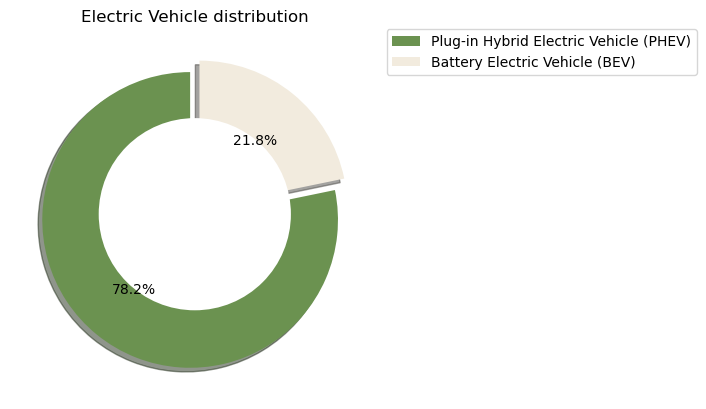

In [11]:
#Distributions of the data 
#Labels for the sections of our pie chart
labels = ev_df["Electric Vehicle Type"].unique()

# The values of each section of the pie chart
values = ev_df["Electric Vehicle Type"].value_counts()
colors = ['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"]

# Create the pie chart

values.plot(kind='pie', labels=labels, colors = colors, explode=[0.05, 0.05], shadow=True, autopct='%1.1f%%', 
            legend = True,  title = 'Electric Vehicle distribution', labeldistance=None, ylabel='',startangle=90)
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)





<Axes: title={'center': 'Electric Vehicles Registered by Year'}, xlabel='Model Year'>

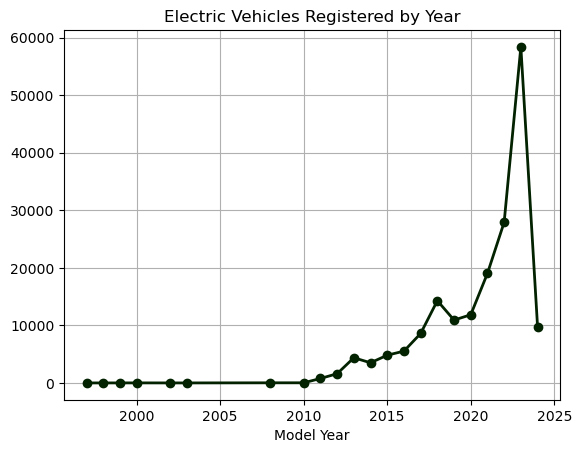

In [12]:
#cars registration by years (make)
cars_years = ev_df.groupby('Model Year').size()
colors = ['#022200','#6B9250', '#F2EBDE', '#D6CFEE', "#E7E900"]
cars_years.plot(kind='line', marker="o",color= colors, linewidth=2, grid = True, linestyle = '-', title = "Electric Vehicles Registered by Year")


In [13]:
#create a pivot table to show the vehicle distribution by make 

make_pv = ev_df.pivot_table(index='Make', aggfunc='size')
make_pv.sort_values(ascending = False)

Make
TESLA                   80819
NISSAN                  14037
CHEVROLET               13864
FORD                     9527
BMW                      7680
KIA                      7642
TOYOTA                   6519
VOLKSWAGEN               5163
JEEP                     4690
HYUNDAI                  4561
RIVIAN                   4425
VOLVO                    4288
AUDI                     3738
CHRYSLER                 3059
MERCEDES-BENZ            1647
PORSCHE                  1158
MITSUBISHI                980
MINI                      925
POLESTAR                  895
SUBARU                    838
HONDA                     836
FIAT                      783
DODGE                     608
MAZDA                     506
CADILLAC                  434
LEXUS                     398
LINCOLN                   270
SMART                     269
LUCID                     238
JAGUAR                    236
GENESIS                   190
FISKER                    112
LAND ROVER                 58
ALFA 

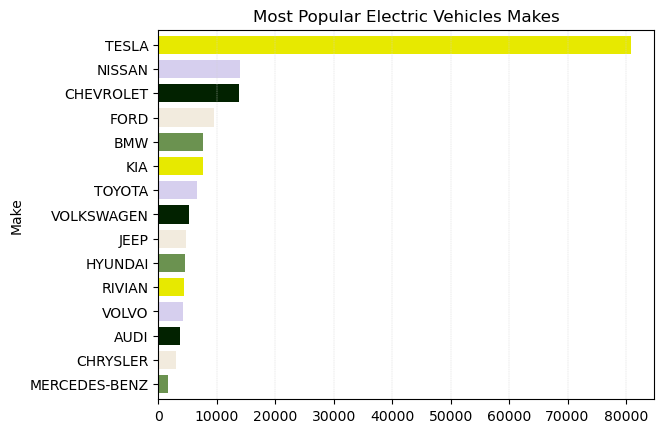

In [16]:
#most popular cars registration (make)
make_dist = ev_df["Make"].value_counts()
make_dist = make_dist.sort_values().tail(15)
colors = ['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"]
#create the bar chart

make_dist.plot.barh(width=0.75, title = "Most Popular Electric Vehicles Makes",  color=colors)
plt.ylabel = "Make"
plt.xlabel = "Count"
plt.grid(color='lightgray', linestyle='--', linewidth=0.3, axis = 'x')
plt.show()


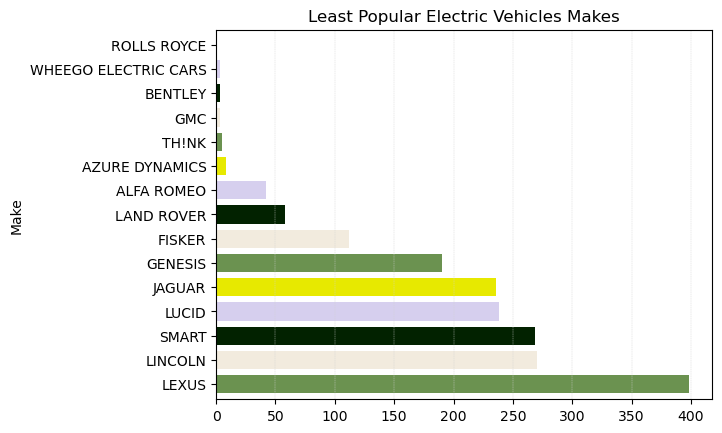

In [17]:
#least popular cars registration (make)
make_dist = ev_df["Make"].value_counts()
make_dist = make_dist.tail(15)
colors = ['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"]
#create the bar chart

make_dist.plot.barh(width=0.75, title = "Least Popular Electric Vehicles Makes",   color=colors)
plt.ylabel = "Make"
plt.xlabel = "Count"
plt.grid(color='lightgray', linestyle='--', linewidth=0.3, axis = 'x')
plt.show()


In [18]:
#create a pivot table to show the vehicle distribution by make 
pivot_table = ev_df.pivot_table(index='Model', aggfunc='size')
pivot_table.sort_values(ascending = False)

Model
MODEL Y        37007
MODEL 3        30150
LEAF           13356
MODEL S         7731
BOLT EV         6935
               ...  
918                1
750E               1
S-10 PICKUP        1
SPECTRE            1
CYBERTRUCK         1
Length: 143, dtype: int64

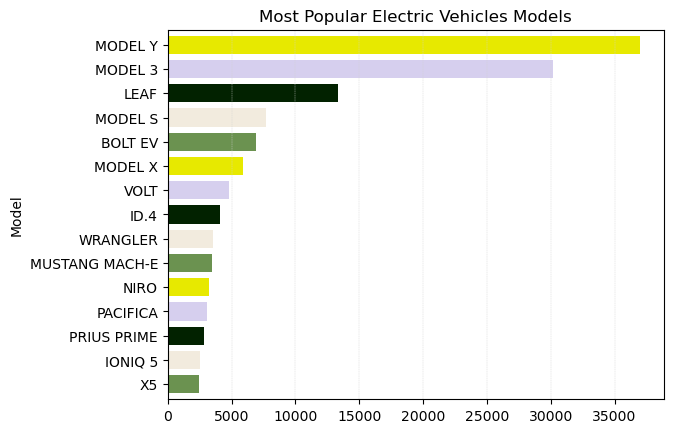

In [19]:
#most popular cars registration (model)
model_dist = ev_df["Model"].value_counts()
model_dist = model_dist.sort_values().tail(15)
colors = ['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"]
#create the bar chart

model_dist.plot.barh(width=0.75, title = "Most Popular Electric Vehicles Models",   color=colors)
plt.ylabel = "Make"
plt.xlabel = "Count"
plt.grid(color='lightgray', linestyle='--', linewidth=0.3, axis = 'x')
plt.show()


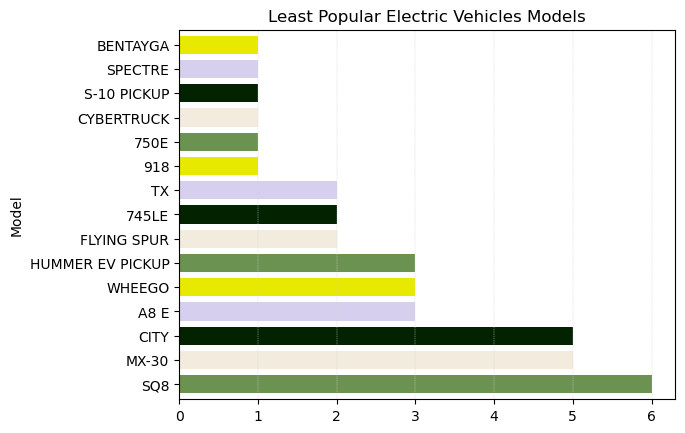

In [20]:
#least popular cars registration (make)
model_dist = ev_df["Model"].value_counts()
model_dist = model_dist.tail(15)
colors = ['#6B9250', '#F2EBDE','#022200', '#D6CFEE', "#E7E900"]
#create the bar chart

model_dist.plot.barh(width=0.75, title = "Least Popular Electric Vehicles Models", color=colors)
plt.ylabel = "Make"
plt.xlabel = "Count"
plt.grid(color='lightgray', linestyle='--', linewidth=0.3, axis = 'x')
plt.show()
